<a href="https://colab.research.google.com/github/i-ganza007/Multimodal-Data-Preprocessing/blob/main/Data_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data Merge

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
customer_transactions = pd.read_csv("customer_transactions.csv")
customer_social_profiles = pd.read_csv("customer_social_profiles.csv")
print(customer_social_profiles.head())
print(customer_transactions.head())

  customer_id_new social_media_platform  engagement_score  \
0            A178              LinkedIn                74   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A162               Twitter                89   
4            A197               Twitter                92   

   purchase_interest_score review_sentiment  
0                      4.9         Positive  
1                      4.8          Neutral  
2                      1.6         Positive  
3                      2.6         Positive  
4                      2.3          Neutral  
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04 

In [22]:
# Extracting the id columns for each dataset
customer_transactions_id= customer_transactions['customer_id_legacy']
customer_social_profiles_id= customer_social_profiles['customer_id_new']

In [4]:
# printing them
print(customer_transactions_id)
print(customer_social_profiles_id)

0      151
1      192
2      114
3      171
4      160
      ... 
145    102
146    100
147    104
148    189
149    113
Name: customer_id_legacy, Length: 150, dtype: int64
0      A178
1      A190
2      A150
3      A162
4      A197
       ... 
150    A125
151    A116
152    A189
153    A162
154    A155
Name: customer_id_new, Length: 155, dtype: object


In [25]:
customer_social_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


In [26]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


In [27]:
customer_transactions.describe()

,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


In [28]:
customer_transactions.describe()

,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


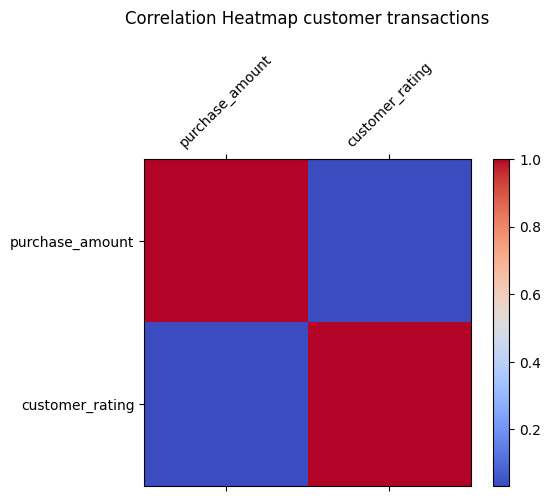

In [32]:
# Diagrams
# Correlation for customer transactions
numeric_df = customer_transactions[['purchase_amount', 'customer_rating']]
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticklabels(corr.columns)
plt.title("Correlation Heatmap customer transactions", pad=20)
plt.tight_layout()
plt.show()


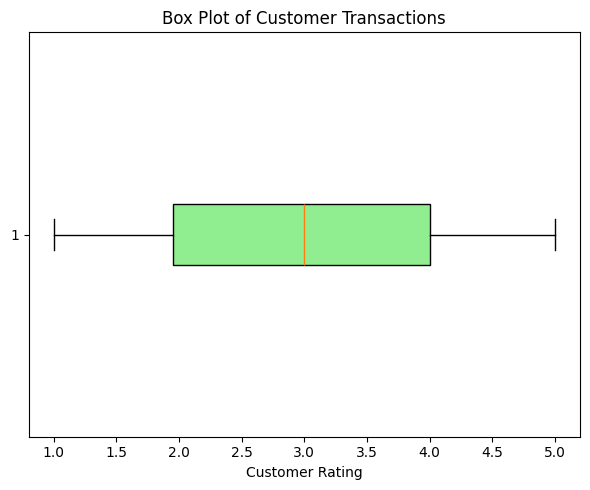

In [33]:
# Box plot customer transactions for outliers
plt.figure(figsize=(6, 5))
plt.boxplot(customer_transactions['customer_rating'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.title("Box Plot of Customer Transactions")
plt.xlabel("Customer Rating")
plt.tight_layout()
plt.show()


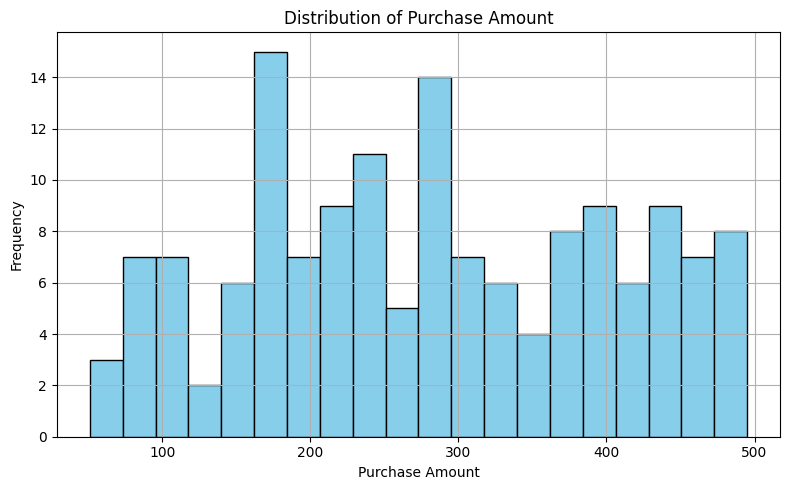

In [34]:
# Customer transactions Dist
plt.figure(figsize=(8, 5))
plt.hist(customer_transactions['purchase_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

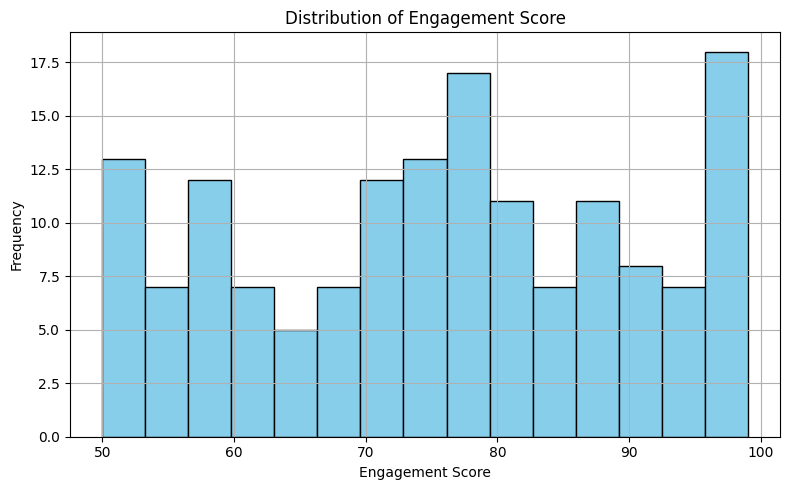

In [35]:
# Distribution for customer socials
plt.figure(figsize=(8, 5))
plt.hist(customer_social_profiles['engagement_score'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


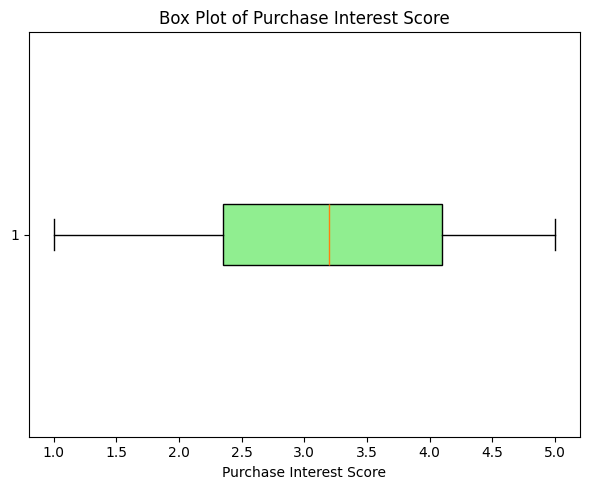

In [36]:
# Box Plot (socials)
plt.figure(figsize=(6, 5))
plt.boxplot(customer_social_profiles['purchase_interest_score'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.title("Box Plot of Purchase Interest Score")
plt.xlabel("Purchase Interest Score")
plt.tight_layout()
plt.show()


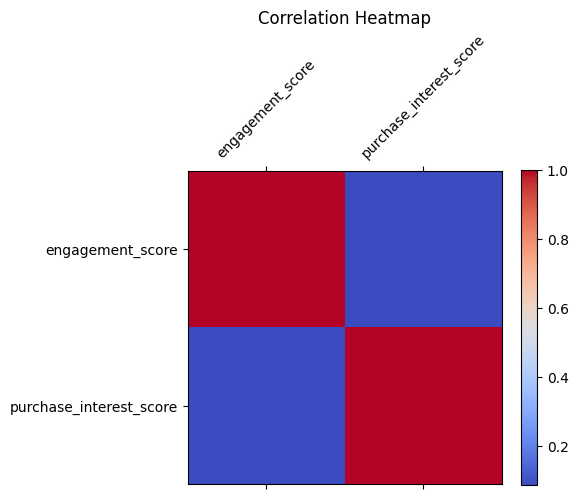

In [37]:
# correattion for socials dataset
numeric_df = customer_social_profiles.select_dtypes(include='number')
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticklabels(corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [5]:
# Step 1: Extract number from A151 → 151 and merging two datasets
customer_social_profiles["id_number"] = customer_social_profiles["customer_id_new"].str.extract(r"(\d+)").astype(int)
customer_transactions.rename(columns={"customer_id_legacy": "id_number"}, inplace=True)
merged_dataset = pd.merge(customer_transactions, customer_social_profiles, on="id_number", how="inner")

In [14]:
print(merged_dataset.head())
print("Merged dataset shape:", merged_dataset.shape)

   id_number  transaction_id  purchase_amount purchase_date product_category  \
0        151            1001              408    2024-01-01           Sports   
1        151            1001              408    2024-01-01           Sports   
2        151            1001              408    2024-01-01           Sports   
3        192            1002              332    2024-01-02      Electronics   
4        114            1003              442    2024-01-03      Electronics   

   customer_rating customer_id_new social_media_platform  engagement_score  \
0              2.3            A151                TikTok                61   
1              2.3            A151               Twitter                72   
2              2.3            A151               Twitter                82   
3              4.2            A192             Instagram                60   
4              2.1            A114              Facebook                87   

   purchase_interest_score review_sentiment  
0   

In [7]:
# Checking duplicats
merged_dataset.duplicated().sum()

np.int64(6)

In [9]:
# removing duplicates
merged_dataset = merged_dataset.drop_duplicates()

In [8]:
# checking null values
merged_dataset.isna().sum()

,0
id_number,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,19
customer_id_new,0
social_media_platform,0
engagement_score,0
purchase_interest_score,0


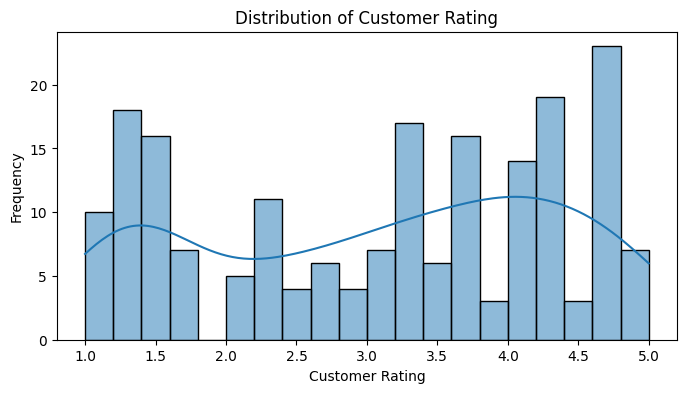

In [15]:
# Plot the distribution of customer_rating
plt.figure(figsize=(8, 4))
sns.histplot(merged_dataset['customer_rating'], kde=True, bins=20)
plt.title('Distribution of Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()


In [16]:
print("Skewness:", merged_dataset['customer_rating'].skew())
print(merged_dataset['customer_rating'].describe())


Skewness: -0.21213602149240177
count    196.000000
mean       3.078061
std        1.260638
min        1.000000
25%        1.700000
50%        3.200000
75%        4.200000
max        5.000000
Name: customer_rating, dtype: float64


In [17]:
# we used mean due to low skewness
merged_dataset['customer_rating'] = merged_dataset['customer_rating'].fillna(
    merged_dataset['customer_rating'].mean()
)

In [18]:
merged_dataset.isna().sum()

,0
id_number,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,0
customer_id_new,0
social_media_platform,0
engagement_score,0
purchase_interest_score,0


In [19]:
# Saving the merged data into a csv
merged_dataset.to_csv('merged_dataset.csv', index=False)